# SEA JCLplus+ JCL Defects Metrics Analysis Notebook

## Description

This notebook reads the JCLplus+ Detail Record, performs a descriptive analysis of JCL defects by error type.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
          <a href="#business">1. Business Understanding</a><br>
          <a href="#prep">2. Data Preparation</a>
              <ul>
                <li><a href="read">Data Acuisition - JCLplus+ Global Record</a></li>
                <li><a href="transform">Perform Transformations</a></li>
                <li><a href="info">Records Information</a></li>
              </ul>
          <a href="#business">3. Analytic Approach</a><br>
            <ul>
                <li><a href="desc">Descriptive Analysis</a></li>
                <li><a href="index">Indices</a></li>
                <li><a href="visual">Data Visualization</a></li>
                   <ul>
                    <li><a href="def">Total Defects by Error Type</a></li>
                    <li><a href="def_date">Total Defects by Date</a></li>
                   </ul>    
              </ul>
         
                
</div>

<hr>

<h2> 1. Business Understanding</h2>

JCLplus+ is equipped with an engine that not only produces Summary defect reports but also generates two typles of records (comma-separated CSV format) with significant information that can be easily imported by any RDBMS, spreadsheet or other reporting system. 

Jclplus+ generates a detailed Validation/Simulation metrics, and with this data organizations could more easily put into action practical and low cost actions to attack the ‘low-hanging fruit’, and cleanup recurring JCL defects and other root causes for problems. The goal should be toward delivery of high-quality JCL elements. 

The global and gdeail records can help to determine a course of action to identify categories and priorities of repetitive problems that may impact the time to delivery of JCL components. These rates can also serve as a baseline for benchmarking purposes and validate the proper adoption of Best Practices procedures. These reports can also be broken down by failure type and by promotion stage within the SCM.


<h2> 2. Data Preparation</h2>

In [1]:
# Importing Pandas Library
import pandas as pd

#Importing other Libraries
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

### _Read JCLplus+ Global File_
_Note: 
Change the path of the JClplus+ Global CSV file. This can also be downloaded from a remote location and saves it to your local drive using urllib module in Python 3_

In [2]:
jpd=pd.read_csv('C:\\sea\\logstash-6.0.1\\data\\jpdetail.csv',header=None)
jpd.columns=['sdate', 'stime' , 'edate', 'etime', 'jpjob' , 'stepname' ,
             'smfid' , 'rel', 'userid' , 'mode' , 'rules', 'warn', 'error' , 'stmtserr', 'rcode' ,
             'ruleds' , 'rulename', 'rexxrule', 'exitrule' , 'msgrange', 'msgsuf' ,
             'msgsev' , 'msgprefix', 'msgnum', 'msgtype' , 'msgtxt' ,'pds' , 'member' , 'jobname', 'trail']


In [3]:
jpd.dtypes

sdate         int64
stime        object
edate        object
etime        object
jpjob        object
stepname     object
smfid        object
rel          object
userid       object
mode         object
rules         int64
warn          int64
error         int64
stmtserr      int64
rcode         int64
ruleds       object
rulename     object
rexxrule     object
exitrule     object
msgrange     object
msgsuf       object
msgsev        int64
msgprefix    object
msgnum        int64
msgtype      object
msgtxt       object
pds          object
member       object
jobname      object
trail        object
dtype: object

In [4]:
jpd.sdate=jpd.sdate.astype('datetime64[ns]')
jpd.edate=jpd.edate.astype('datetime64[ns]')

### _Exploratory Data Analysis_

In [5]:
jpd.head()

,sdate,stime,edate,etime,jpjob,stepname,smfid,rel,userid,mode,...,msgsuf,msgsev,msgprefix,msgnum,msgtype,msgtxt,pds,member,jobname,trail
0,1970-01-01 00:00:00.000043321,09:26:26:00,2018-08-09,09:26:27:00,SEAUSER,ISPFPROC,JRCM,4.4G,SEAUSER,EDIT,...,J,4,XRP,2412,WARN,"DYNALLOC FAILED, UNABLE TO VERIFY MEMBER IN: J...",JRC1.SEAUSER.JCL.CNTL,#ACS#TR0,XI1XXXB,
1,1970-01-01 00:00:00.000043321,09:26:26:00,2018-08-09,09:26:27:00,SEAUSER,ISPFPROC,JRCM,4.4G,SEAUSER,EDIT,...,J,4,XRP,2350,WARN,DATASET NOT FOUND: JRC1.SEAUSER.JCL ...,JRC1.SEAUSER.JCL.CNTL,#ACS#TR0,XI1XXXB,
2,1970-01-01 00:00:00.000043321,09:26:26:00,2018-08-09,09:26:27:00,SEAUSER,ISPFPROC,JRCM,4.4G,SEAUSER,EDIT,...,J,4,XRP,2350,WARN,DATASET NOT FOUND: JRC1.SLBJES2A.PLUSPACK.LINK...,JRC1.SEAUSER.JCL.CNTL,#ACS#TR0,XI1XXXB,
3,1970-01-01 00:00:00.000043321,09:26:26:00,2018-08-09,09:26:27:00,SEAUSER,ISPFPROC,JRCM,4.4G,SEAUSER,EDIT,...,J,4,XRP,2307,ERROR,NO PARAMETERS ON STATEMENT ...,JRC1.SEAUSER.JCL.CNTL,#ACS#TR0,XI1XXXB,
4,1970-01-01 00:00:00.000043321,09:26:26:00,2018-08-09,09:26:27:00,SEAUSER,ISPFPROC,JRCM,4.4G,SEAUSER,EDIT,...,J,8,XRP,2114,ERROR,"MISSING ""="" SIGN AFTER ""DSN"" KEYWORD ...",JRC1.SEAUSER.JCL.CNTL,#ACS#TR0,XI1XXXB,


In [6]:
a=jpd.shape
print('The Dimension of the JCLplus+ Global Dataframe is',a)


The Dimension of the JCLplus+ Global Dataframe is (3757, 30)


In [7]:
date_min=jpd['sdate'].min()
date_max=jpd['sdate'].max()
print('Data Collected between ',date_min,' to ',date_max)

Data Collected between  1970-01-01 00:00:00.000043321  to  1970-01-01 00:00:00.000043391


In [8]:
jpd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3757 entries, 0 to 3756
Data columns (total 30 columns):
sdate        3757 non-null datetime64[ns]
stime        3757 non-null object
edate        3757 non-null datetime64[ns]
etime        3757 non-null object
jpjob        3757 non-null object
stepname     3757 non-null object
smfid        3757 non-null object
rel          3757 non-null object
userid       3757 non-null object
mode         3757 non-null object
rules        3757 non-null int64
warn         3757 non-null int64
error        3757 non-null int64
stmtserr     3757 non-null int64
rcode        3757 non-null int64
ruleds       3757 non-null object
rulename     3757 non-null object
rexxrule     3757 non-null object
exitrule     3757 non-null object
msgrange     3757 non-null object
msgsuf       3757 non-null object
msgsev       3757 non-null int64
msgprefix    3757 non-null object
msgnum       3757 non-null int64
msgtype      3757 non-null object
msgtxt       3757 non-null object


In [10]:
jpdn = jpd.filter(['sdate','userid','rulename','rexxrule','msgrange','msgsev',
                   'msgprefix','msgnum','msgtype','msgtxt','jobname'], axis=1)

In [11]:
jpdn.head()

,sdate,userid,rulename,rexxrule,msgrange,msgsev,msgprefix,msgnum,msgtype,msgtxt,jobname
0,1970-01-01 00:00:00.000043321,SEAUSER,STATS,**NA**,-,4,XRP,2412,WARN,"DYNALLOC FAILED, UNABLE TO VERIFY MEMBER IN: J...",XI1XXXB
1,1970-01-01 00:00:00.000043321,SEAUSER,STATS,**NA**,-,4,XRP,2350,WARN,DATASET NOT FOUND: JRC1.SEAUSER.JCL ...,XI1XXXB
2,1970-01-01 00:00:00.000043321,SEAUSER,STATS,**NA**,-,4,XRP,2350,WARN,DATASET NOT FOUND: JRC1.SLBJES2A.PLUSPACK.LINK...,XI1XXXB
3,1970-01-01 00:00:00.000043321,SEAUSER,STATS,**NA**,-,4,XRP,2307,ERROR,NO PARAMETERS ON STATEMENT ...,XI1XXXB
4,1970-01-01 00:00:00.000043321,SEAUSER,STATS,**NA**,-,8,XRP,2114,ERROR,"MISSING ""="" SIGN AFTER ""DSN"" KEYWORD ...",XI1XXXB


<h2> 2. Analytic Approach</h2>

#### _Defects Count by Msg. Severity_ 

In [12]:
jpd1=jpdn.groupby(['msgsev','msgtype']).size()
print(jpd1)

msgsev  msgtype
0       INFO         18
4       ERROR       254
        RULES        26
        WARN       1098
8       ERROR      1164
        RULES      1186
12      ERROR        11
dtype: int64


#### _Top 10 Defects Type_

In [13]:
msg_count=jpdn['msgnum'].value_counts().to_frame()
msg_count.head(10)

,msgnum
354,1212
2350,720
2328,687
2423,147
2307,139
2324,128
2405,114
2244,68
2357,51
2412,41


<h3>Top Standard Rules Defects</h3>

In [14]:
jpdr=jpdn.loc[jpdn['msgnum'] == 354]
jpdr=jpdr.groupby('msgtxt').size()
jpdr.sort_values(ascending = False) 

msgtxt
WK00400 - CONTROL CARD MEMBER NAME IF NOT 7 CHAR LENGTH                                               824
WK00103 - INVALID APP CODED IN PGM NAME                                                                64
WKJ0005 - INVALID JOBNAME FREQUENCY (8TH POS VALID VALUES ARE D W M Y R)                               57
WKJ0001 - Member Name Not equal to Jobname                                                             55
WKJ0004 - INVALID JOBNAME STATUS (1ST POS VALID VALUES ARE P Z T)                                      54
WKJ0102 - PGM NAME LENGTH IS NOT 8 CHARACTERS LONG                                                     49
WKJ0003 - INVALID APP CODED IN JOBNAME (2ND & 3RD POS)                                                 45
WK00104 - Invalid PGM usage Code (3rd Pos)                                                             28
WKE0101 - JOBNAME HAS MORE  THAN 1 STEP                                                                26
WKJ0002 - JOBNAME LENGTH IS NOT 8 CHARA

_Note:_
- The standard enforcement message WK00400 frequently flag jobs. 
- This example shows a lack of Company's standards knowledge when deploying an application
- A campaign or an automated procedure should be implemented for developers (shift-left)


<h3>Top Critical Defects</h3>

In [15]:
jpd.msgnum=jpd.msgnum.astype('str')
space = ' '
jpde=jpd.filter(['msgsev','msgnum','msgtxt'], axis=1)
jpde['msghdr'] = jpde['msgnum'] + space + jpde['msgtxt']
jpde=jpde.loc[jpdn['msgnum'] != 354]
jpde=jpde.loc[jpdn['msgsev'] > 7]
jpde=jpde.groupby('msghdr').size()
jpde=jpde.sort_values(ascending = False).head(10)
print(jpde)

msghdr
2328 MISPLACED "DD" STATEMENT                                                                              687
2324 TARGET OF OVERIDE NOT FOUND                                                                           128
2106 MISSING, INVALID OR UNKNOWN STATEMENT TYPE                                                             35
2371 ERROR IN OBTAINING GDGLIMIT, RC: 00000008                                                              28
2112 INVALID ARGUMENT IN "ALLOCATION CONSIDERATIONS" FIELD OF "SPACE" KEYWORD: OOSNIP                       20
2292 DATACLAS NOT DEFINED - IMSDLOG                                                                         16
2292 DATACLAS NOT DEFINED - DC006                                                                            9
2120 INVALID KEYWORD PARAMETER: DISL                                                                         9
2923 JOB HAS NO STEPS                                                                                    

### _Data Visualization_

#### _Number of Defects by Error Type_

In [16]:
jpdev=jpd.loc[jpdn['msgnum'] != 354]
jpdev=jpd.loc[jpdn['msgsev'] > 7]
jpdev=jpdev.filter(['msgnum'], axis=1)
jpdev=jpdev.groupby('msgnum').size()
jpdev=jpdev.sort_values(ascending = False).head(10)
print(jpdev)

msgnum
354     1186
2328     687
2324     128
2357      51
2106      35
2120      34
2292      33
2371      28
3008      24
2112      22
dtype: int64


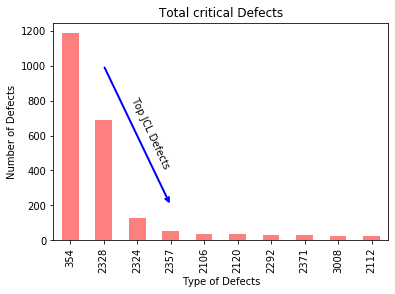

In [17]:
#Plot the data:
jpdev.plot(x=jpdev,kind="bar",color="r",legend=None,alpha=0.5)
plt.ylabel('Number of Defects')
plt.xlabel('Type of Defects')
plt.title('Total critical Defects')

# Annotate arrow
plt.annotate('',                      # s: str. will leave it blank for no text
             xy=(1, 1000),            # place head of the arrow at point (year 2012 , pop 70)
             xytext=(3, 200),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='<-',connectionstyle='arc3',color='blue', lw=2)
             )
# Annotate Text
plt.annotate('Top JCL Defects',       # text to display
             xy=(3, 400),             # start the text at at point (year 2008 , pop 30)
             rotation=-65,            # based on trial and error to match the arrow
             va='bottom',             # want the text to be vertically 'bottom' aligned
             ha='right',)              # want the text to be horizontally 'left' algned.

plt.show()

